## Analyzing the degree to which data and turbidity corrections can be compared/applied across sites and SUNA instruments

In [49]:
library(ggplot2)
library(dplyr)
library(tidyverse)
library(lmerTest)
library(viridis)

Loading required package: viridisLite



In [39]:
setwd("/Users/jhosen/gdrive/SUNA_Data/corrected_files/SUNA_grab_merge")
barc_wqg<-readRDS("/Users/jhosen/gdrive/SUNA_Data/corrected_files/SUNA_grab_merge/BARC_SUNA_wqg.rds")
cram_2019_wqg<-readRDS("/Users/jhosen/gdrive/SUNA_Data/corrected_files/SUNA_grab_merge/CRAM_2019_SUNA_wqg.rds")
cram_2020_wqg<-readRDS("/Users/jhosen/gdrive/SUNA_Data/corrected_files/SUNA_grab_merge/CRAM_2020_SUNA_wqg.rds")
liro_2020_wqg<-readRDS("/Users/jhosen/gdrive/SUNA_Data/corrected_files/SUNA_grab_merge/LIRO_2020_SUNA_wqg.rds")
liro_2019_wqg<-readRDS("/Users/jhosen/gdrive/SUNA_Data/corrected_files/SUNA_grab_merge/LIRO_SUNA_wqg.rds")
plra_wqg<-readRDS("/Users/jhosen/gdrive/SUNA_Data/corrected_files/SUNA_grab_merge/PLRA_SUNA_wqg.rds")
sugg_wqg<-readRDS("/Users/jhosen/gdrive/SUNA_Data/corrected_files/SUNA_grab_merge/SUGG_SUNA_wqg.rds")

barc_wqg$Site<-"BARC"
cram_2019_wqg$Site<-"CRAM"
cram_2020_wqg$Site<-"CRAM"
liro_2020_wqg$Site<-"LIRO"
liro_2019_wqg$Site<-"LIRO"
plra_wqg$Site<-"PLRA"
sugg_wqg$Site<-"SUGG"

suna_wqg<-bind_rows(barc_wqg,cram_2019_wqg,cram_2020_wqg,liro_2020_wqg,liro_2019_wqg,plra_wqg,sugg_wqg)


Warning message:
“Removed 8 rows containing missing values (geom_point).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”


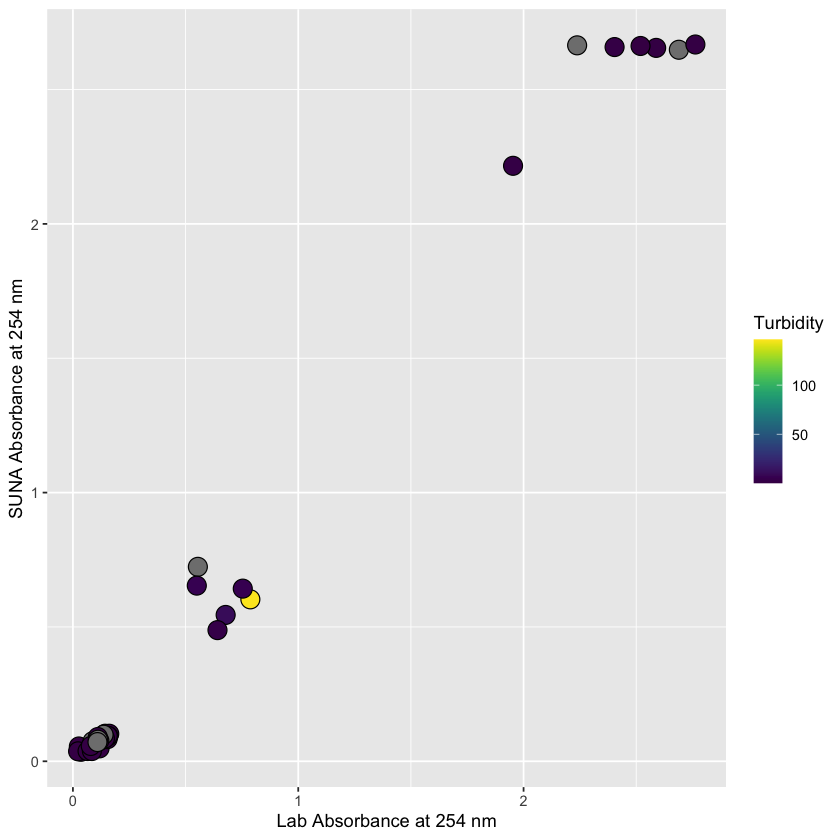

Warning message:
“Removed 8 rows containing missing values (geom_point).”



Call:
lm(formula = uva_250_lab ~ interp_254_c254.mean + turbidity.mean, 
    data = suna_wqg)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.172885 -0.023607 -0.003483  0.023131  0.212917 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.0442825  0.0174216   2.542   0.0171 *  
interp_254_c254.mean 0.9386684  0.0157831  59.473   <2e-16 ***
turbidity.mean       0.0012540  0.0005551   2.259   0.0322 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07929 on 27 degrees of freedom
  (16 observations deleted due to missingness)
Multiple R-squared:  0.9924,	Adjusted R-squared:  0.9919 
F-statistic:  1772 on 2 and 27 DF,  p-value: < 2.2e-16


boundary (singular) fit: see ?isSingular

boundary (singular) fit: see ?isSingular

boundary (singular) fit: see ?isSingular



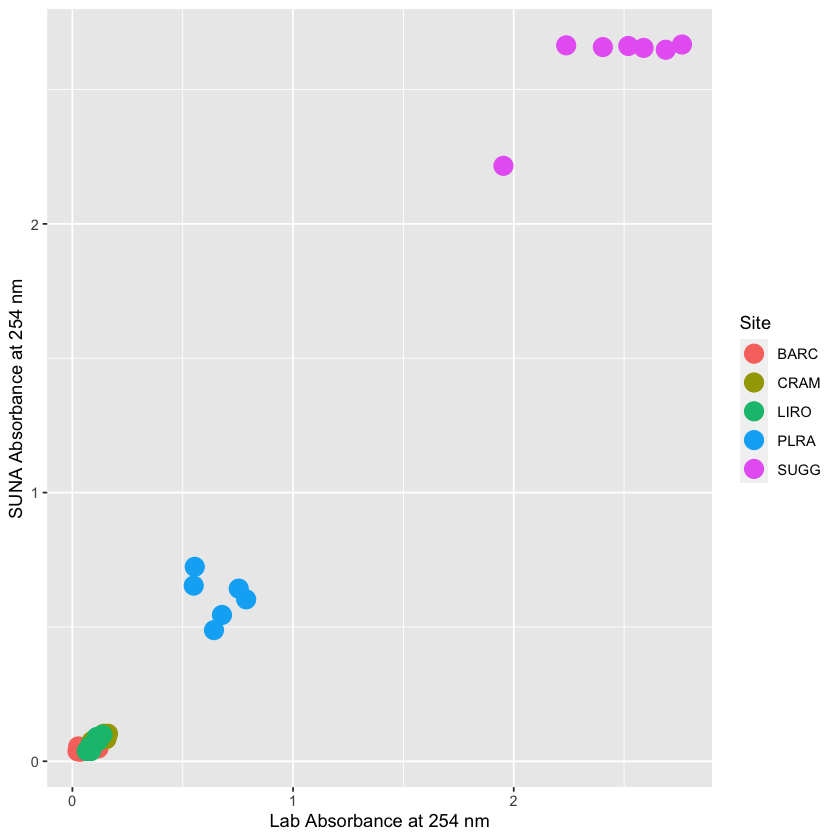

In [53]:
suna_wqg<-subset(suna_wqg,(interp_254_c254.mean<2|uva_250_lab>1) & interp_254_c254.mean>-0.1)

ggplot(suna_wqg,aes(uva_250_lab,interp_254_c254.mean,fill=turbidity.mean))+geom_point(size=5,shape=21)+
xlab("Lab Absorbance at 254 nm")+
ylab("SUNA Absorbance at 254 nm")+
scale_fill_viridis(name="Turbidity")

ggsave("~/neon_suna/plots/plot_cross_site_254_turb.pdf",width = 20, height = 20, units = "cm")

ggplot(suna_wqg,aes(uva_250_lab,interp_254_c254.mean,color=Site))+geom_point(size=5)+
xlab("Lab Absorbance at 254 nm")+
ylab("SUNA Absorbance at 254 nm")
ggsave("~/neon_suna/plots/plot_cross_site_254_site.pdf",width = 20, height = 20, units = "cm")

#summary(lm(uva_250_lab~interp_254_c254.mean*turbidity.mean,suna_wqg))
#summary(lm(uva_250_lab~interp_254_c254.mean*log10(turbidity.mean),suna_wqg))
#summary(lm(uva_250_lab~interp_254_c254.mean,suna_wqg))
summary(lm(uva_250_lab~interp_254_c254.mean+turbidity.mean,suna_wqg))
#summary(lm(uva_250_lab~interp_254_c254.mean+log10(turbidity.mean),suna_wqg))


uva_254_turb_int_lmer <- lmer(uva_250_lab ~ interp_254_c254.mean * turbidity.mean + (1|Site) , suna_wqg ,REML=FALSE)
#summary(uva_254_turb_int_lmer)

uva_254_lmer <- lmer(uva_250_lab ~ interp_254_c254.mean + (1|Site) , suna_wqg ,REML=FALSE)
#summary(uva_254_lmer)

uva_254_turb_lmer <- lmer(uva_250_lab ~ interp_254_c254.mean + turbidity.mean + (1|Site) , suna_wqg ,REML=FALSE)
#summary(uva_254_turb_lmer)

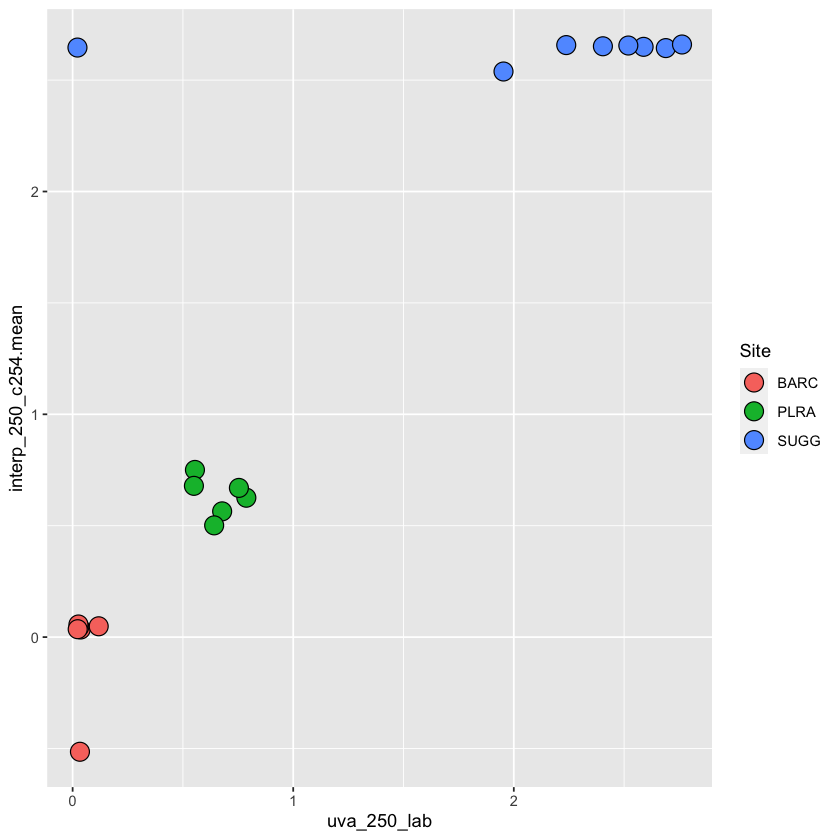

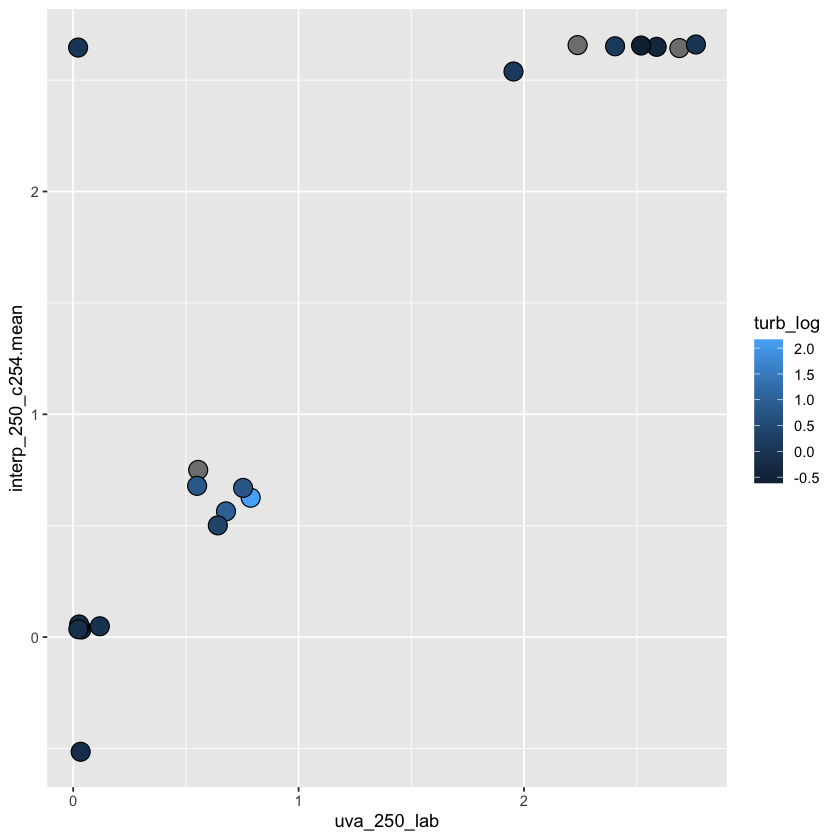

In [28]:
ggplot(suna_grab,aes(uva_250_lab,interp_250_c254.mean,fill=Site))+
geom_point(size=5,shape=21)

ggsave("~/neon_suna/plots/Lakes_UVA250_Comp.pdf",width = 20, height = 20, units = "cm")

ggplot(suna_grab,aes(uva_250_lab,interp_250_c254.mean,fill=turb_log))+
geom_point(size=5,shape=21)

ggsave("~/neon_suna/plots/Lakes_UVA250_Turb.pdf",width = 20, height = 20, units = "cm")